In [1]:
# Copyright (c) Microsoft Corporation. All rights reserved.
# Licensed under the MIT License.

### Install Dependencies

In [2]:
pip install pandas==1.3.5 matplotlib==3.5.2 numpy==1.19.5

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\jajod\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


### Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

### Download & Save dataset files
Download and save the 'analog-diary-study-entries-anonymized.csv' and 'analog-diary-study-codes.csv' files from the below link and save it locally in the same folder as this notebook file.

https://msropendata.com/datasets/23cff2ea-4cf6-4863-9b23-f1a7a9dc7ec3

### Load & Explore Data

In [5]:
df_analog_diary_study_entries_anonymized = pd.read_csv('analog-diary-study-entries-anonymized.csv')
df_analog_diary_study_codes = pd.read_csv('analog-diary-study-codes.csv')

In [7]:
print("Inspect data structure for -> Analog diary study entries anonymized")
df_analog_diary_study_entries_anonymized.head(10)

Inspect data structure for -> Analog diary study entries anonymized


,Snippet Id,Scout Id,Title,Local,Time Zone,UTC,"Q1: Tell us about what's in the photo, what tools are being used, what are you trying to accomplish, etc.?",Q3: Title your snippet,"Q4: Why do you choose to do it this way instead of digitally (e.g. using a computer, tablet, phone, etc.)?",Q5: How often do you do this?
0,12957,1222,snippet,9/9/2011 15:24,Central Time (US & Canada),2011-09-09 20:24:26 UTC,my personal recycling bin. we have this proble...,snippet,skip,skip
1,12956,1222,snippet,9/9/2011 15:22,Central Time (US & Canada),2011-09-09 20:22:27 UTC,Hand written card to a business associate who ...,snippet,skip,skip
2,12955,1222,snippet,9/9/2011 15:16,Central Time (US & Canada),2011-09-09 20:16:27 UTC,Notes from a planning meeting. May not mean m...,snippet,skip,skip
3,12953,1222,snippet,9/9/2011 15:08,Central Time (US & Canada),2011-09-09 20:08:33 UTC,notes taken on an agenda from a meeting that I...,snippet,skip,skip
4,12952,1222,Snippet,9/9/2011 15:08,Central Time (US & Canada),2011-09-09 20:08:28 UTC,This is a message for my boss. I normally giv...,Snippet,skip,skip
5,12949,1222,Snippet,9/9/2011 14:56,Central Time (US & Canada),2011-09-09 19:56:38 UTC,A car that I was selling. Just being lazy and...,Snippet,skip,skip
6,12948,1222,Snippet,9/9/2011 14:54,Central Time (US & Canada),2011-09-09 19:54:43 UTC,We mad a sign for my sons 8th grade promotion....,Snippet,skip,skip
7,12946,1222,Snippet,9/9/2011 14:16,Central Time (US & Canada),2011-09-09 19:16:39 UTC,This is a sign that I posted at the Tiki Bar. ...,Snippet,skip,skip
8,12944,1222,Snippet,9/9/2011 14:06,Central Time (US & Canada),2011-09-09 19:06:27 UTC,This is a note for my daughter..Basically her ...,Snippet,skip,skip
9,12942,1212,Laptop Identification,9/9/2011 13:58,Central Time (US & Canada),2011-09-09 18:58:25 UTC,"At work, we are required to have identificatio...",Laptop Identification,skip,skip


In [6]:
print("Inspect data structure for -> Analog diary study codes")
df_analog_diary_study_codes.head(10)

Inspect data structure for:
Analog diary study entries anonymized
Analog diary study codes


,Id,avoid paper waste,avoid waste,ballpoint pen,cognition support,diary,digital-potential: no,emotional,emotional attachement,flag,...,why - personal touch,why - place strategically,why - portable,why - recipient feels good,why - retain info,why - reuse,why - shows time & effort,why - symbols easier,why - uniquely mine,why - visually unique
0,12957,,,,,,,,,,...,,X,,,,,,,,
1,12956,,,,,,,,,,...,X,,,,,,,,,
2,12955,,,,,,,,,,...,,,,,,,,,,
3,12953,,,,,,,,,,...,,,,,,,,,,
4,12952,,,,,,X,,,,...,,X,,,,,,,,
5,12949,,,,,,,,,,...,,,,,,,,,,
6,12948,,,,,,,,,,...,X,,,,,,X,,,
7,12946,,,,,,,,,,...,,,,,,,,,,
8,12944,,,,,,X,,,,...,,X,,,,,,,,
9,12942,,,,,,,,,,...,,,,,,,,,,X


In [50]:
# get diary entries to create a graph from the 'analog diary study codes' dataset
column_names = []
column_values = []
for column in df_analog_diary_study_codes.columns:
    if column != 'Id':
        value_counts = df_analog_diary_study_codes[column].value_counts()
        if 'X' in value_counts.index and value_counts['X'] > 15: # only include entries with a count greater than 15 to reduce the chart information
            column_names.append(column)
            column_values.append(value_counts['X'])

print(column_names)
print(column_values)

['goal - communicate', 'goal - make list', 'goal - record ideas', 'goal - record notes', 'list', 'medium - blank paper', 'medium - bound lined paper', 'medium - post it', 'todo', 'tool - pen', 'tool - pencil', 'what: annotation', 'what: coordinate and collaborate', 'what: form-filling', 'what: ideation', 'what: labelling', 'what: recordings', 'what: relationship', 'what: snippet-list-other', 'what: snippet-list-shopping list', 'what: snippet-list-todo', 'why - faster than digital', 'why - parallel task better', 'why - place strategically']
[17, 45, 23, 28, 39, 19, 26, 16, 17, 88, 17, 83, 19, 20, 39, 31, 40, 30, 21, 17, 21, 25, 24, 26]


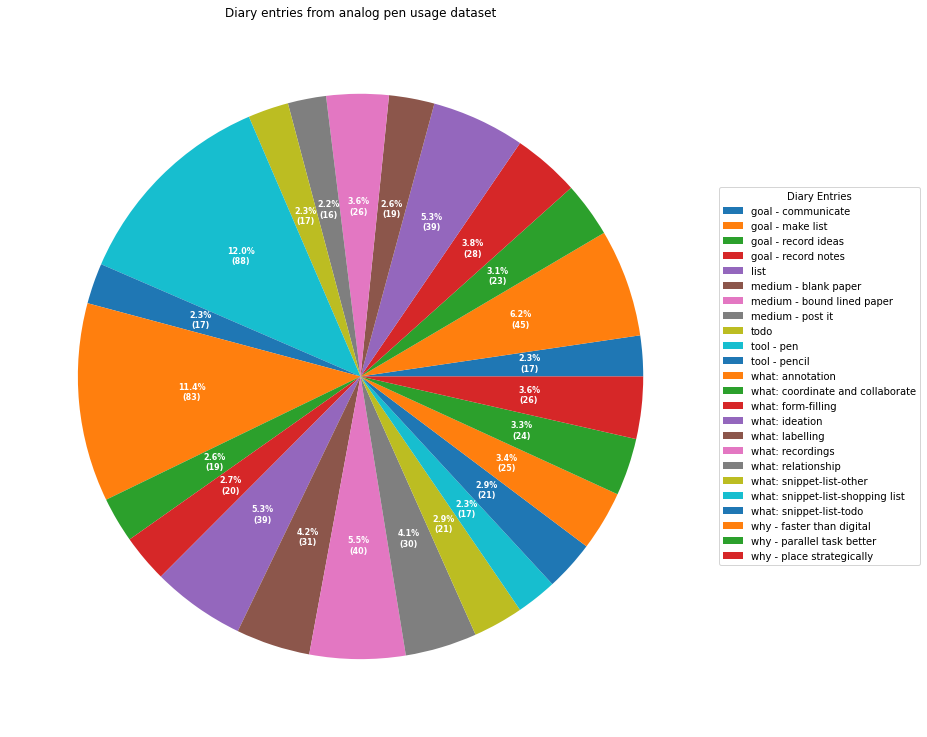

In [51]:
# create a pie chart with the entries for a specific count of matches

fig, ax = plt.subplots(figsize=(16, 13), subplot_kw=dict(aspect="equal"))

data = column_values

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, column_names,
          title="Diary Entries",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Diary entries from analog pen usage dataset")

plt.show()